# Outliers

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Pandas\\newplacementdata.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [5]:
# even = ((n/2) + ((n/2) + 1))/2
# odd = ((n/2) + 1)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

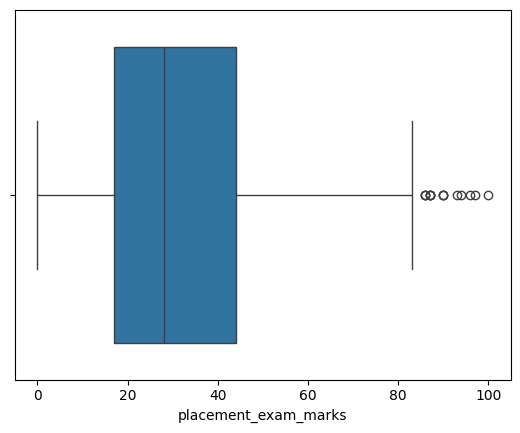

In [8]:
sns.boxplot(x = df['placement_exam_marks'])

In [10]:
# Finding the IRQ

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.27)

In [11]:
percentile25

np.float64(17.0)

In [12]:
percentile75

np.float64(18.0)

In [15]:
IQR = percentile75 - percentile25
IQR

np.float64(1.0)

In [16]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

np.float64(19.5)

In [17]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(15.5)

# Finding Our Outliers

In [19]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
5,7.30,23,1
7,7.12,39,1
...,...,...,...
994,6.48,63,0
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0


In [20]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed
3,6.42,8,1
6,6.69,11,0
11,6.38,7,1
23,6.05,11,0
24,6.44,11,0
...,...,...,...
978,6.78,12,0
979,7.00,13,1
983,6.81,11,1
992,6.26,12,0


In [61]:
# Trimming => lower(4) ... 1 , upper(25) ... 50 => here 1,50 are outliers =>
# lower(4) <=>  upper(25) => mid_data

# Capping => lower(4) ... 1 , upper(25) ... 50 => capping lower point => lower point(1)
# upper point upper point(50) => range expand => outliers removed

In [21]:
# Trimming (Outlier Removing Technique 1)

In [22]:
newdf = df[df['placement_exam_marks'] < upper_limit]

In [23]:
newdf

,cgpa,placement_exam_marks,placed
3,6.42,8,1
4,7.23,17,0
6,6.69,11,0
10,6.82,16,1
11,6.38,7,1
...,...,...,...
983,6.81,11,1
984,6.89,16,1
986,7.09,19,1
992,6.26,12,0


In [24]:
# Comparison

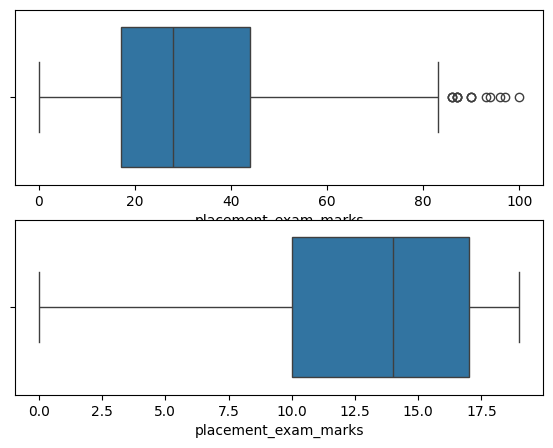

In [25]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x = newdf['placement_exam_marks'])
plt.show()

In [26]:
# Capping(Outlier Removin Technique 2)

In [27]:
new_df_cap = df.copy()

In [28]:
# min = 5 , max = 15
# min 4 ,3 ,1
# max = 20 , 30 , 50

# updated_min_value = 1
# updated_max_value = 50

In [29]:
new_df_cap['placement_exam_marks'] = np.where(

    new_df_cap['placement_exam_marks'] > upper_limit ,
    upper_limit ,

    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit ,
        lower_limit ,
        new_df_cap['placement_exam_marks']
    )
)

In [30]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,19.5,1
1,7.46,19.5,1
2,7.54,19.5,1
3,6.42,15.5,1
4,7.23,17.0,0
...,...,...,...
995,8.87,19.5,1
996,9.12,19.5,1
997,4.89,19.5,0
998,8.62,19.5,1


In [31]:
new_df_cap.shape

(1000, 3)

In [32]:
# Comparison

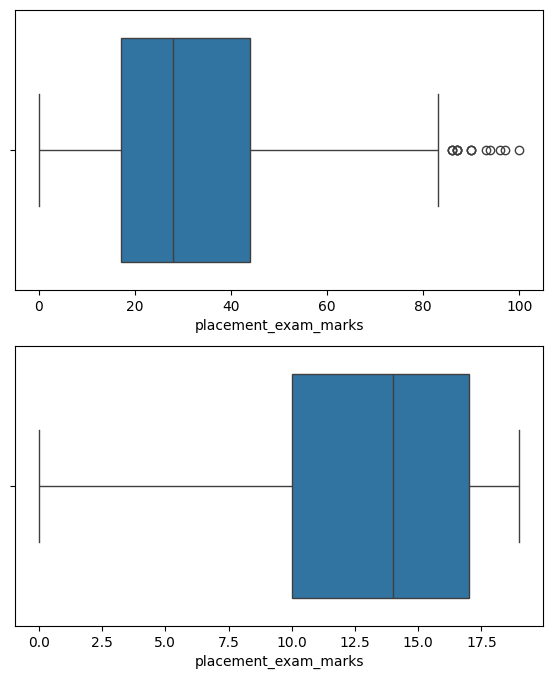

In [33]:
plt.figure(figsize = (15,8))

plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x = newdf['placement_exam_marks'])
plt.show()

# Titanic Dataset: 
- age ---> outliers ---> check
- Handle ---> trimming , capping.


In [34]:
df = pd.read_csv("C:\\Pandas\\titanic.csv")

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

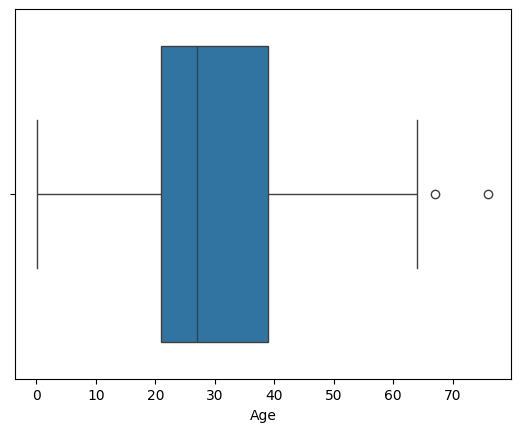

In [39]:
sns.boxplot(x = df['Age'])

In [46]:
# Finding the IRQ

percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)

In [47]:
percentile25

np.float64(21.0)

In [48]:
percentile75

np.float64(39.0)

In [49]:
IQR = percentile75 - percentile25
IQR

np.float64(18.0)

In [50]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

np.float64(66.0)

In [51]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(-6.0)

# Finding our outliers

In [55]:
df[df['Age']>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [56]:
df[df['Age']<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [58]:
newdf = df[df['Age'] < upper_limit]
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


In [59]:
# Comparison

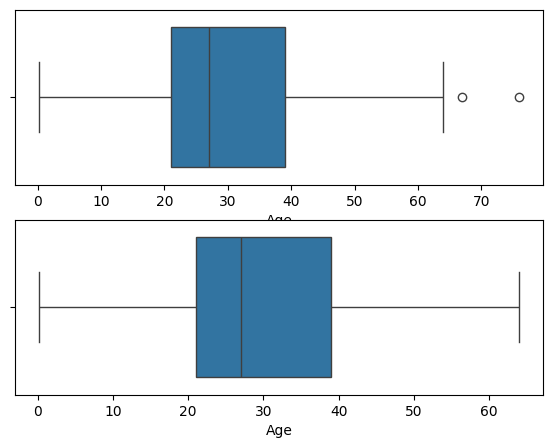

In [60]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x = df['Age'])

plt.subplot(224)
sns.boxplot(x = newdf['Age'])
plt.show()

In [62]:
# Capping

In [63]:
new_df_cap = df.copy()

In [65]:
new_df_cap['Age'] = np.where(

    new_df_cap['Age'] > upper_limit ,
    upper_limit ,

    np.where(
        new_df_cap['Age'] < lower_limit ,
        lower_limit ,
        new_df_cap['Age']
    )
)

In [66]:
new_df_cap

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
new_df_cap.shape

(418, 12)

In [68]:
# comparison

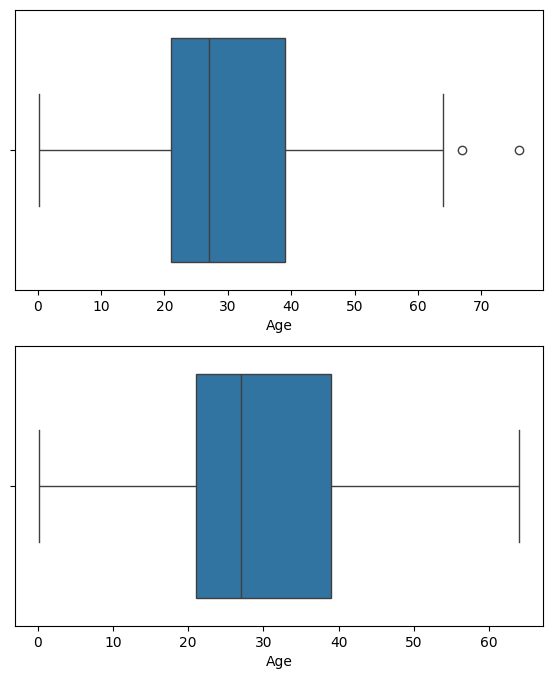

In [70]:
plt.figure(figsize = (15,8))

plt.subplot(222)
sns.boxplot(x = df['Age'])

plt.subplot(224)
sns.boxplot(x = newdf['Age'])
plt.show()